Your full name (first name, last name):     < add here >

# Guidelines for Completing and Submitting the 1st Project for [GML23](https://cms.cispa.saarland/gml23/)

## Instructions

1. Work in the same colab that was shared with you. Do not create a copy.
   - **A Gmail account is necessary for Colab editing**. If you don't have a gmail account, please create a temporary one that matches your name and share it with us. You will then be notified when your gmail has edit permissions.
   - Before editing verify that your modifications are being saved. A confirmation of 'All changes saved' should appear next to 'Help' in the top bar.
   - **Important:** do not work in a copy, but instead work in the same colab that was shared with you.

2. Complete the tasks

  2.1. Implement the code
      - it is best to make the code readable (e.g., by writing functions it same operations are repeated, using readable variable names instead of one-letter name, etc.)
      - consider adding comments to explain what the code block does.
      - the code must run without errors, otherwise points would not be provided.

  2.2. Answer the questions denoted with [Q] in the last section. Your answers should be placed directly below each question, following the [A].

  2.3. Do not edit the instructions/questions text.

3. Submit your project by completing [this form](https://forms.gle/oxrnF4CnWZWoynpZ9)--again, gmail account required. This form will request you to:

  3.1. *Upload a PDF version of your Colab.* Ensure all cells are expanded, displaying the entire code; if a code line is trimmed in the PDF, split it in different lines. Use the built-in browser print function (e.g., for Chrome, File > Print > Save as PDF > Save).

  3.2. *Provide the edit link to the Colab you worked in.* This link should be the same one shared with you.

  3.3. *Important:* your project grade will be determined based on the provided PDF. Hence, to avoid potential point deductions confirm that:
      - none of the (code) cells containing your implementation is collapsed; and
      - the text cells containing your answers are in display mode (and not in edit).

  3.4. **Do not edit the colab after completing the submitting form.** If the PDF and the provided colab differ you will not pass the project.

4. Enjoy the holidays ❄



### For your implementation, you can either
1. Employ Automatic differentiation with [PyTorch](https://pytorch.org/), in which case the optimization variables will be PyTorch tensors.
2. Utilize "manual" backpropagation implementation with [NumPy](https://numpy.org/) tensors.

In other words, you can either use PyTorch tensors and leverage backpropagation from the PyTorch library (for the former case), or use NumPy to compute the derivatives manually and apply them to the methods. The objectives are straightforward for analytically computing derivatives; therefore, opting for the latter approach will not entail additional complexity.



*Remark:* Please refrain from employing a different approach or library than the ones specified above. If it becomes absolutely necessary, kindly seek confirmation from your professors before proceeding.



----
### **Important:**
*Work individually for this project. Kindly refrain from collaborating on the implementation of any functions with your peers to avoid point deductions.*

----
### *For those unfamiliar with Colab:*
- Colab comprises two types of cells: *Code* and *Text*. Navigate to the bottom line of the cell with your mouse to find options for adding a code or text cell. Alternatively, use the **+ Code**  and  **+ Text** buttons at the top.
- To display a text cell exclusively in display mode, double-click anywhere on the rendered text (typically on the right). Conversely, to edit a displayed cell, double-click the displayed text.
- Execute a code cell by pressing Shift-Enter (when the cell is being edited) or use the play button with mouse-overlay.
- To commence editing a code cell in display mode, double-click it or press 'show code.'
- For easier navigation within Colab, we recommend expanding the 'table of contents' button on the left (located above the magnifying glass icon).
- Employ: \$ equation \$ or \$\$ equation \$\$ To write equations in the text cells, as in LaTeX.  
- For additional information, refer to: [colab-intro](https://colab.research.google.com/?utm_source=scs-index).

# VI Methods' Implementation

It would be best if you could abstract the VI optimization methods because these will be used/called from the two sections below. However if it is easier for you to implement them directly where they are called, then skip this section.


If the former approach, implement below the update rules of the methods we studied in the course. Consider that each method is called with the necessary inputs to perform parameter update. Either the method returns value of the new parameters, or peforms in-place update if a pointer to the paramters is passed to the function.


In [1]:
#@title 1. Gradient Descent (GD)
import time
def gradient_descent(init_x , init_y ,fun , grad , step_size=0.01,num_iter=50):
    start_time = time.time()
    elapsed_times = []
    
    x_val = []
    y_val = []
    
    sol = []
    
    x = init_x
    y = init_y
    
    for _ in range(num_iter):
      x_val.append(x)
      y_val.append(y)
      
      #get current val of function
      f = fun(x,y)
      sol.append(f)
      
      #get the gradients 
      dx,dy = grad(x,y)
      
      #update the parameter
      x = x - step_size * dx
      y = y + step_size * dy
      
      elapsed_times.append(time.time() - start_time)
      
      

    
    return x_val, y_val , sol ,elapsed_times
  
 


In [2]:
#@title 2. Optimistic Gradient Descent (OG)

def optimistic_gradient_descent(init_x , init_y ,fun , grad , step_size=0.01,num_iter=50):
    start_time = time.time()
    elapsed_times = []
    
    x_val = []
    y_val = []
    
    sol = []
    
    x = init_x
    y = init_y
    
    #init prev gradient 
    dx_prev, dy_prev = 0, 0
    
    for _ in range(num_iter):
      
      x_val.append(x)
      y_val.append(y)
      
      #get current val of function
      f = fun(x,y)
      sol.append(f)
      
      #get the gradients
      dx,dy = grad(x,y)
      
      #update parameter
      x = x - 2*step_size * dx + step_size * dx_prev
      y = y + 2*step_size * dy - step_size * dy_prev
      
      #update prev gradient
      dx_prev, dy_prev = dx, dy
      
      elapsed_times.append(time.time() - start_time)

    
    return x_val, y_val , sol, elapsed_times
  
  
  
  


In [3]:
#@title 3. ExtraGradient (EG)
def extra_gradient_descent(init_x , init_y ,fun , grad , step_size=0.01,num_iter=50):
    start_time = time.time()
    elapsed_times = []
    
    x_val = []
    y_val = []
    
    sol = []
    
    x = init_x
    y = init_y
    
    for _  in range(num_iter):
    
      x_val.append(x)
      y_val.append(y)
      
      #get current val of function
      f = fun(x,y)
      sol.append(f)
      
      #get the gradients 
      dx,dy = grad(x,y)
      
      #get extra gradient
      x_2 = x - step_size * dx
      y_2 = y + step_size * dy
      
      dx_2,dy_2 = grad(x_2,y_2)
      
      #update the parameter
      x = x - step_size * dx_2
      y = y + step_size * dy_2
      
      elapsed_times.append(time.time() - start_time)
    
    
    
    return x_val, y_val , sol, elapsed_times
    

In [4]:
#@title 4. Lookahead (LA) with: $k=5$, $\alpha=0.5$
""" LA-update.

        For better modularity, we recommend that this function implements the
        averaging only (versus running the k steps with the base optimizer here)
"""
import numpy as np
def lookahead(init_x , init_y, fun, grad , optim,num_iter=50,step_size=0.01 ,k=5, alpha=.5):
    start_time = time.time()
    elapsed_times = []
    
    x_val = []
    y_val = []
    
    sol = []
    
    x = init_x
    y = init_y
    
    for _ in range(num_iter):
      x_val.append(x)
      y_val.append(y)
      
      f = fun(x,y)
      sol.append(f)
        
      x_2 ,y_2 ,_ , _ = optim(x ,y ,fun , grad , step_size, num_iter=k)
    
      
      x = x + alpha*( np.mean(x_2)-x)
      y = y + alpha*( np.mean(y_2)-y)
      
      elapsed_times.append(time.time() - start_time)
      
    return x_val, y_val , sol, elapsed_times
  
        
       

In [5]:
#@title 5. Proximal Point
import numpy as np
from numpy.linalg import inv
def proximal_point(init_x , init_y ,fun, grad, step_size=0.01,num_iter=50):
    start_time = time.time()
    elapsed_times = []
  
    
    x_val = []
    y_val = []
    
    sol = []
    
    x = init_x
    y = init_y
    

    if isinstance(x, (int, float)):
    
      for i in range(num_iter):
        x_val.append(x)
        y_val.append(y)
        
        #get current val of function
        f = fun(x,y)
        sol.append(f)
          
        #get the gradients 
        dx,dy = grad(x,y)

        #update parameter
        x =  (1 / 1+step_size *dx)  *x
        y =  (1 / 1-step_size *dy)  *y
        
        elapsed_times.append(time.time() - start_time)
        
    else:
      
      I = np.eye(len(x))
      for i in range(num_iter):
        x_val.append(x)
        y_val.append(y)
          
        #get current val of function
        f = fun(x,y)
        sol.append(f)
            
        #get the gradients 
        dx,dy = grad(x,y)

        #update parameter
        x = np.dot(inv(I + step_size * dx), x)
        y = np.dot(inv(I - step_size * dy), y)
        
        elapsed_times.append(time.time() - start_time)

    return x_val, y_val , sol, elapsed_times
    
 

# Experiments in $\mathcal{R}^2$

Let $x\in\mathcal{R}$, $y\in\mathcal{R}$. Consider the following problem in $\mathcal{R}^2$:
$$
     \min_{x\in\mathcal{R}}\ \max_{y\in\mathcal{R}} \quad  \frac{1}{30} x+ \frac{29}{30} x \cdot y  +  \frac{1}{30} y    \,.
$$


## Implement a Plotting Function for 2D Vector Fields, $F\colon \mathcal{R}^2 → \mathcal{R}^2 $

- draw arrows for a finite set of 2D points taken at a grid (the granularity/density can be an argument to the function with some default value; feel free to tune it for better clarity)
- if a solution point is passed to the function, draw it with a star
- you can choose if you'd like to plot $F$ or $-F$

**Remark:**  The depicted length for each vector can be some length proportional to its actual length; it does not necessarily need to be equal. This could enhance the clarity of the plot, especially when dealing with large values that might otherwise result in overly prominent arrows.  Similarly, the use of tranparent vectors could provide better clarity.

In [6]:
#@title plotting vector field $F\colon \mathcal{R}^2 \rightarrow \mathcal{R}^2 $
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import numpy as np

#tolerance just for plotting overlapping points
def plot_vector_field(_vr_field, solution=None,tolerance=0.1):
  """ Plots the given vector field.
  Recommendation: make the arrows transparent

  :param _vr_field: ['function'] pointer to a function that for a 2D vector returns 2d vector
  :param solution: [tuple, optional] 2D solution point, default None
  :return: [xxx]  # or :return: [None]
  """
  
  # Generate grid points
  x = np.linspace(-10, 10, 20)
  y = np.linspace(-10, 10, 20)
  X, Y = np.meshgrid(x, y)
  U, V = _vr_field(X, Y)
  
  # Create plot
  plt.figure(figsize=(8, 8))
  plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='blue')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Vector Field')


  colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'cyan', 'gray', 'lime']

  if solution is not None:
    plotted_positions = set()
     
    for i,(x,y,des) in enumerate(solution):
      
      #check if 2 points are close to each other and size down if True -> better for seeing close points
      overlapping = any(euclidean((x, y), pos) < tolerance for pos in plotted_positions)
      if overlapping:
        size=50
      else:
        size = 200

      color = colors[i]
      plt.scatter(*[x,y], marker='*', color=color, s=size,label =des)
      plotted_positions.add((x, y))
    
    plt.legend(loc ='upper right')
  plt.show()


### Optional: verify the v-r field plotting on the $\min_x \max_y \ xy$ game

[Optional] We recommend running a quick test while passing as argument python function that for any two-dimensional vector returns
$$ F ≜  	\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  = \begin{bmatrix} x_2 \\ - x_1 \end{bmatrix}
$$
If implemented correctly, it should look similar to the one in Lec. 6, slide 9 (right plot).

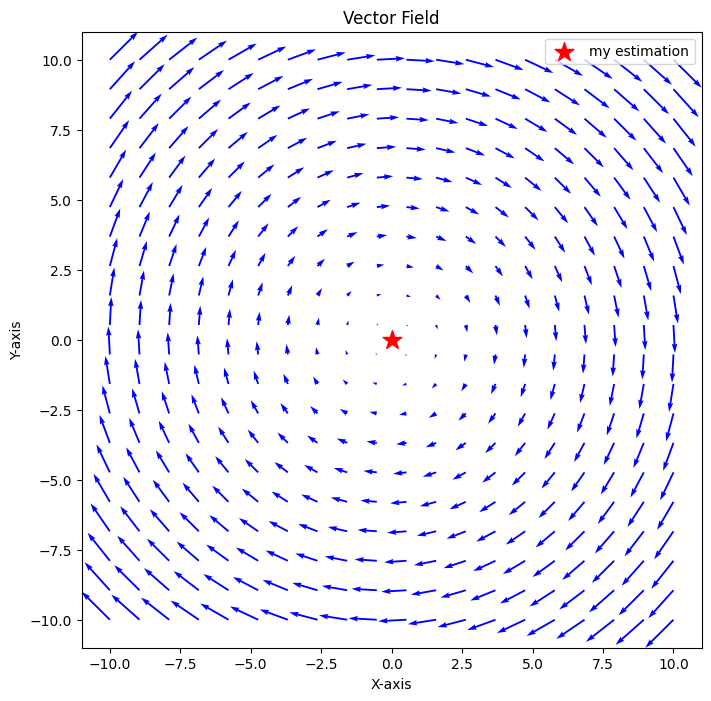

In [7]:
# [optional] verify
def function(x1,x2):
    return x2, -x1

plot_vector_field(function ,solution=[(0,0,'my estimation')])

## Run all the methods and plot their trajectories, along with the vector field

- Initialize $(x,y)$ to $(1,1)$.
- use simultaneous updates.
- Use step size of your choice, but not too big (so that at least some methods converge). Recommended is to use the same step size for all the methods.
- Fix the number of iterations for all methods to a fixed number of your choice.
- For LA, use GD as a base optimizer. It is your choice if you'd like to plot only the iterate after the averaging, or also at every iteration of the base optimizer.
- Plot all methods' trajectories in one plot (GD, EG, OGD, LAk-GD, PP), while marking each iterate on each of the trajectories.
- Provide legend. Each method should be somehow differentiated, e.g., use different colors and/or different markers for the different methods.
- compute and display the solution.
- plot also the vector field (use the function above).
- Display the plot (no needd to save it).

In [8]:
# define the fucntion and its gradient
def function(x, y):
    return (1/30) * x + (29/30) * x * y + (1/30) * y

def gradient(x,y):
    dx = (1/30) + (29/30) * y
    dy = (29/30) * x + (1/30)
    
    return dx, -dy
    


In [9]:
#set hyperparameter
step_size = 0.005
num_iter = 1000
 
#execute the methodes
x_GD, y_GD , sol_GD , _ = gradient_descent(init_x=1,init_y=1 , fun = function, grad=gradient ,step_size=step_size, num_iter=num_iter)
x_OGD, y_OGD , sol_OGD , _ = optimistic_gradient_descent(init_x=1,init_y=1 , fun = function, grad=gradient ,step_size=step_size, num_iter=num_iter) 
x_EGD, y_EGD , sol_EGD, _ = extra_gradient_descent(init_x=1,init_y=1 , fun = function, grad=gradient ,step_size=step_size, num_iter=num_iter)
x_LA, y_LA , sol_LA , _ = lookahead(init_x=1,init_y=1 , fun = function, grad=gradient ,step_size=step_size ,optim=gradient_descent,num_iter=num_iter)
x_PP, y_PP , sol_PP , _= proximal_point(init_x=1,init_y=1 , fun = function, grad=gradient ,step_size=step_size, num_iter=num_iter)
 



In [10]:
#get the optimal values and display them 
optimal_GD_pos = np.argmin(np.abs(sol_GD))

optimal_OGD_pos = np.argmin(np.abs(sol_OGD))

optimal_EGD_pos = np.argmin(np.abs(sol_EGD))

optimal_LA_pos = np.argmin(np.abs(sol_LA))

optimal_PP_pos = np.argmin(np.abs(sol_PP))

print('Gradient Descent solution:')
print(f'Value: {sol_GD[optimal_GD_pos]}, X: {x_GD[optimal_GD_pos]}, Y: {y_GD[optimal_GD_pos]}')

print('\nOptimistic Gradient Descent solution:')
print(f'Value: {sol_OGD[optimal_OGD_pos]}, X: {x_OGD[optimal_OGD_pos]}, Y: {y_OGD[optimal_OGD_pos]}')

print('\nExtra Gradient Descent solution:')
print(f'Value: {sol_EGD[optimal_EGD_pos]}, X: {x_EGD[optimal_EGD_pos]}, Y: {y_EGD[optimal_EGD_pos]}')

print('\nLookahead solution:')
print(f'Value: {sol_LA[optimal_LA_pos]}, X: {x_LA[optimal_LA_pos]}, Y: {y_LA[optimal_LA_pos]}')

print('\nProximal Point solution:')
print(f'Value: {sol_PP[optimal_PP_pos]}, X: {x_PP[optimal_PP_pos]}, Y: {y_PP[optimal_PP_pos]}')

Gradient Descent solution:
Value: -6.640245886537555e-08, X: -9.960512686935162e-07, Y: -9.960512686935162e-07

Optimistic Gradient Descent solution:
Value: 4.464351192282537e-06, X: 6.690037081980856e-05, Y: 6.690037081980856e-05

Extra Gradient Descent solution:
Value: 4.573068014932188e-06, X: 6.852792711046899e-05, Y: 6.852792711046899e-05

Lookahead solution:
Value: 4.480855222672651e-06, X: 6.714745102748718e-05, Y: 6.714745102748718e-05

Proximal Point solution:
Value: 1.0333333333333334, X: 1, Y: 1


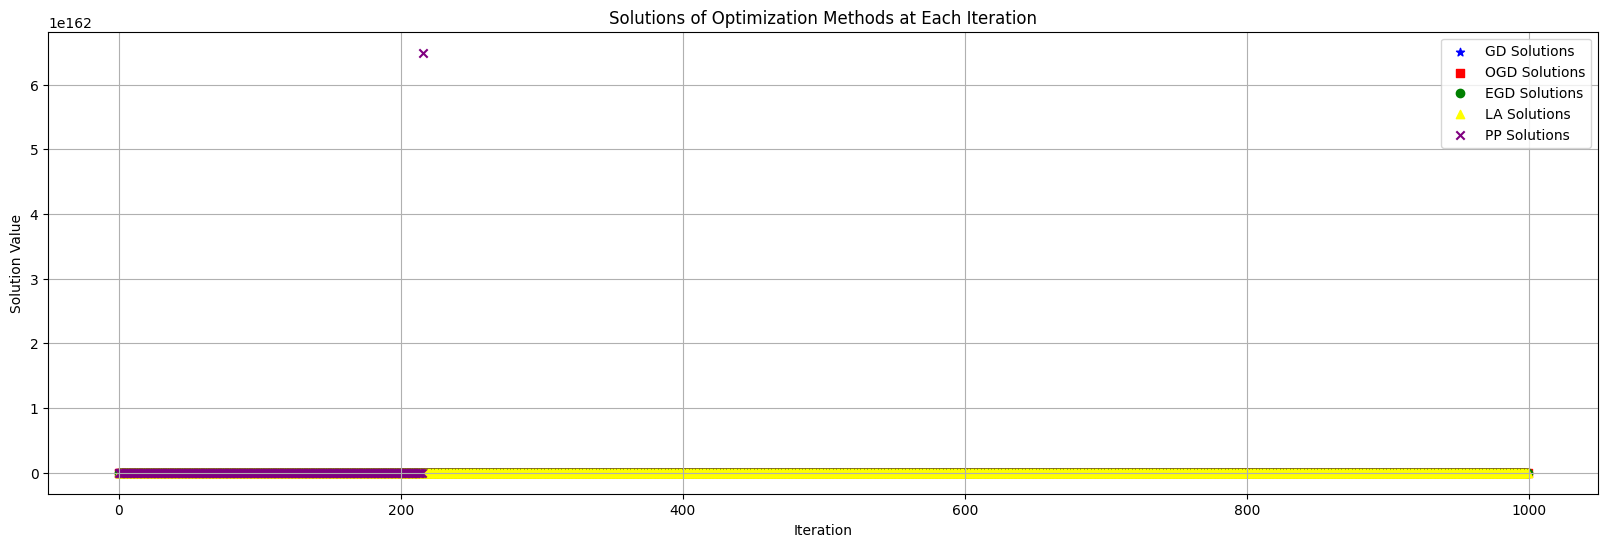

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 6))

#plot each solution
plt.scatter(range(len(sol_GD)), sol_GD, c='blue', marker='*', label='GD Solutions')
plt.scatter(range(len(sol_OGD)), sol_OGD, c='red', marker='s', label='OGD Solutions')
plt.scatter(range(len(sol_EGD)), sol_EGD, c='green', marker='o', label='EGD Solutions')
plt.scatter(range(len(sol_LA)), sol_LA, c='yellow', marker='^', label='LA Solutions')
plt.scatter(range(len(sol_PP)), sol_PP, c='purple', marker='x', label='PP Solutions')


plt.xlabel('Iteration')
plt.ylabel('Solution Value')
plt.legend()

plt.title('Solutions of Optimization Methods at Each Iteration')
plt.grid(True)
plt.show()



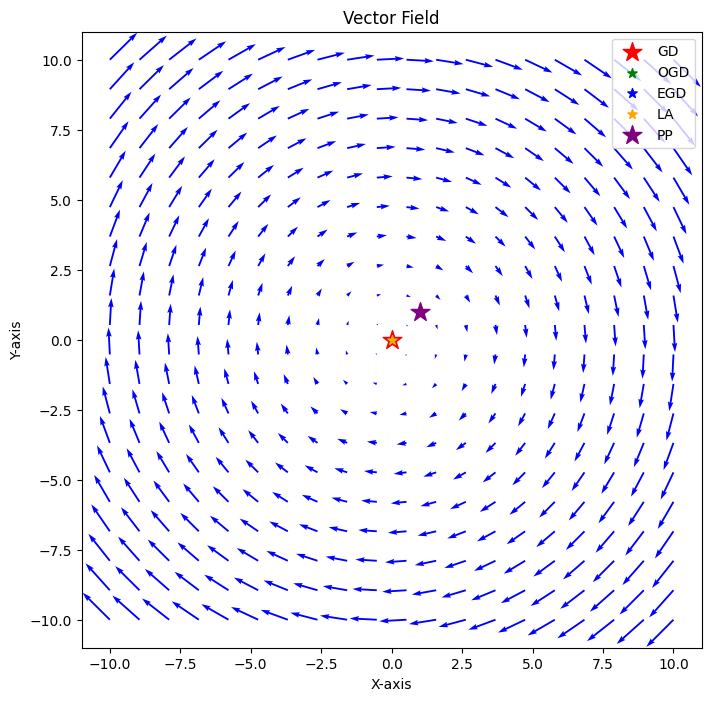

In [12]:
#plot the vector field of the gradient and add all the found solutions 
solutions = [(x_GD[optimal_GD_pos],y_GD[optimal_GD_pos],'GD'),
             (x_OGD[optimal_OGD_pos],y_OGD[optimal_OGD_pos],'OGD'),
             (x_EGD[optimal_EGD_pos],y_EGD[optimal_EGD_pos],'EGD'),
             (x_LA[optimal_LA_pos],y_LA[optimal_LA_pos],'LA'),
             (x_PP[optimal_PP_pos],y_PP[optimal_PP_pos],'PP')
             ]


plot_vector_field(gradient, solution=solutions)


# Experiments in $\mathcal{R}^{1000}$

## Problem

We have:

$$
\min_{\mathbf{x}\in \mathcal{R}^{500}} \quad \max_{ \mathbf{y}\in \mathcal{R}^{500}}  \qquad
\mathbf{x}^\intercal \ \mathbf{b}                \ +\
\mathbf{x}^\intercal \ \mathbf{A} \ \mathbf{y}   \ +\
\mathbf{c}^\intercal \ \mathbf{y}   
$$
where:
- $\mathbf{b}, \mathbf{c}  \in  \mathcal{R}^{500}$; and
- $\mathbf{A}, \mathbf{C}  \in  \mathcal{R}^{500\times 500}$.

----

The values for $\mathbf{b}, \mathbf{c}, \mathbf{A}$, as well as the initialization of the $(\mathbf{x}, \mathbf{y})$ are given to you:
- use `x_init` and `y_init` for the initializations of $x$ and $y$, resp.
- the remaining $\mathbf{b}, \mathbf{c}, \mathbf{A}$ are named below in the same way b, c, A.


Run the appropriate cell(s) below depending on wheather you use numpy only or pytorch.

In [13]:
# run this sell (irrespective if you are using numpy or pytorch) - Do not edit this code

import numpy as np
np.random.seed(1)
_dim = 500
# ---
x_init = 1./np.sqrt(_dim)*np.random.randn(_dim)  # vector `b` in the problem above
y_init = 1./np.sqrt(_dim)*np.random.randn(_dim)  # vector `b` in the problem above
b = 1./np.sqrt(_dim)*np.random.randn(_dim)  # vector `b` in the problem above
c = 1./np.sqrt(_dim)*np.random.randn(_dim)  # vector `c` in the problem above
# --- matrix `A` in the problem above
_M = 1./np.sqrt(_dim)*np.random.randn(_dim, _dim)
A =  (.5-1/60.) * (_M + _M.transpose()) + (1/60.) * (_M - _M.transpose())

In [14]:
# run this sell only if you are using pytorch - Do not edit this code
# run only once, or if needed to re-run it re-run first the one before
#import torch

#x_init = torch.from_numpy(x_init)
#y_init = torch.from_numpy(y_init)
#b = torch.from_numpy(b)
#c = torch.from_numpy(c)
#A = torch.from_numpy(A)

## Compute the exact solution $(\mathbf{x}^\star, \mathbf{y}^\star)$.

Hint: you can use `np.linalg.solve` (cf [docs](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)).

In [15]:
# solution
#defien function and gradient 
def function_R_1000(x,y):
    return np.dot(x.T,b) + np.dot(np.dot(x.T,A),y) + np.dot(c.T,y)


def gradient_R_1000(x,y):
    dx = b+ A.T @ y
    dy = A @ x + c

    return dx,dy

In [16]:
eigenvalues = np.linalg.eigvals(A)

In [17]:
print(all(eigenvalue >= 0 for eigenvalue in eigenvalues))

False


In [18]:

y_star = np.linalg.solve(A, c + A @ b) / 2
x_star = np.linalg.solve(A.T, b)

In [29]:
dx,dy = gradient_R_1000(x_init,y_init)
np.dot(x_init-y_init ,dx-dy)

-0.0035108361693933655

## Run all the methods

Implement all the optimization methods listed above (GD, OG, EG, LA, PP) to solve this problem. Preferably call the functions for the methods that you implemented above (in Section 2).

For this problem, as metric use the squared norm from point $(\mathbf{x}, \mathbf{y}) $ to $(\mathbf{x}^\star, \mathbf{y}^\star)$, that is:
$$
|| \mathbf{x} - \mathbf{x}^\star||_2^2 + || \mathbf{y} - \mathbf{y}^\star||_2^2
$$

As before, you can choose the step size, the number of iterations $T$, use GD for LA, etc.

Initialize the optimization variables to the (x_init, y_init) vectors given above.

For each of the methods:
- compute and store in a list the distance to the optimum (as defiened above) after every $\frac{T}{20}$ iterations.



In [132]:
#define metric
def metric(x,y,x_star,y_star):
    return np.linalg.norm(x - x_star) ** 2 + np.linalg.norm(y - y_star) ** 2
    

In [133]:
import time
# run all methods
#set hyperparameter
step_size = 0.015
num_iter = 200
 
#execute the methodes

x_GD_R_1000, y_GD_R_1000 , sol_GD_R_1000 , elapsed_times_GD = gradient_descent(init_x=x_init,init_y=y_init , fun = function_R_1000, grad=gradient_R_1000 ,step_size=step_size, num_iter=num_iter)
x_OGD_R_1000, y_OGD_R_1000 , sol_OGD_R_1000, elapsed_times_OGD  = optimistic_gradient_descent(init_x=x_init,init_y=y_init , fun = function_R_1000, grad=gradient_R_1000 ,step_size=step_size, num_iter=num_iter) 
x_EGD_R_1000, y_EGD_R_1000 , sol_EGD_R_1000, elapsed_times_EGD = extra_gradient_descent(init_x=x_init,init_y=y_init , fun = function_R_1000, grad=gradient_R_1000 ,step_size=step_size, num_iter=num_iter)
x_LA_R_1000, y_LA_R_1000 , sol_LA_R_1000, elapsed_times_LA = lookahead(init_x=x_init,init_y=y_init, fun = function_R_1000, grad=gradient_R_1000 ,step_size=step_size,num_iter=num_iter ,optim=gradient_descent)
x_PP_R_1000, y_PP_R_1000 , sol_PP_R_1000, elapsed_times_PP = proximal_point(init_x=x_init,init_y=y_init, fun = function_R_1000, grad=gradient_R_1000 ,step_size=step_size, num_iter=num_iter)

In [134]:
def get_distances(x_vals,y_vals,x_star,y_star):

    step = num_iter/20
    distances = []

    for i,(x,y) in enumerate(zip(x_vals,y_vals)):
        
        if not  (i % step):
            distances.append(metric(x,y,x_star,y_star))
          
    return distances

In [135]:
GD_distances = get_distances(x_GD_R_1000, y_GD_R_1000,x_star,y_star)
OGD_distances = get_distances(x_OGD_R_1000, y_OGD_R_1000,x_star,y_star)
EGD_distances = get_distances(x_EGD_R_1000, y_EGD_R_1000,x_star,y_star)
LA_distances = get_distances(x_LA_R_1000, y_LA_R_1000,x_star,y_star)
PP_distances = get_distances(x_PP_R_1000, y_PP_R_1000,x_star,y_star)

## Compare/Plot all the methods

Provide two separate plots of all methods' distances, as follows:
1. plot 1: the $x$ axis is the number of iterations, the $y$ axis is the distance to the optimum.
2. plot 2: the $x$ axis is the number of gradient queries, the $y$ axis is the distance to the optimum.
    - to obtain the $x$-axis values given the list you stored while running the methods, you need to take into account how many gradient queries the method uses per parameter update, e.g., for EG you need to multiply by two.
    - (optional) clip the curves so that they all end at the same value on the x-axis.

---
**Bonus Point (Optional):** provide a third plot, where
3. the $x$-axis is the wall clock time ($y$ axis is distance to optimum as before).

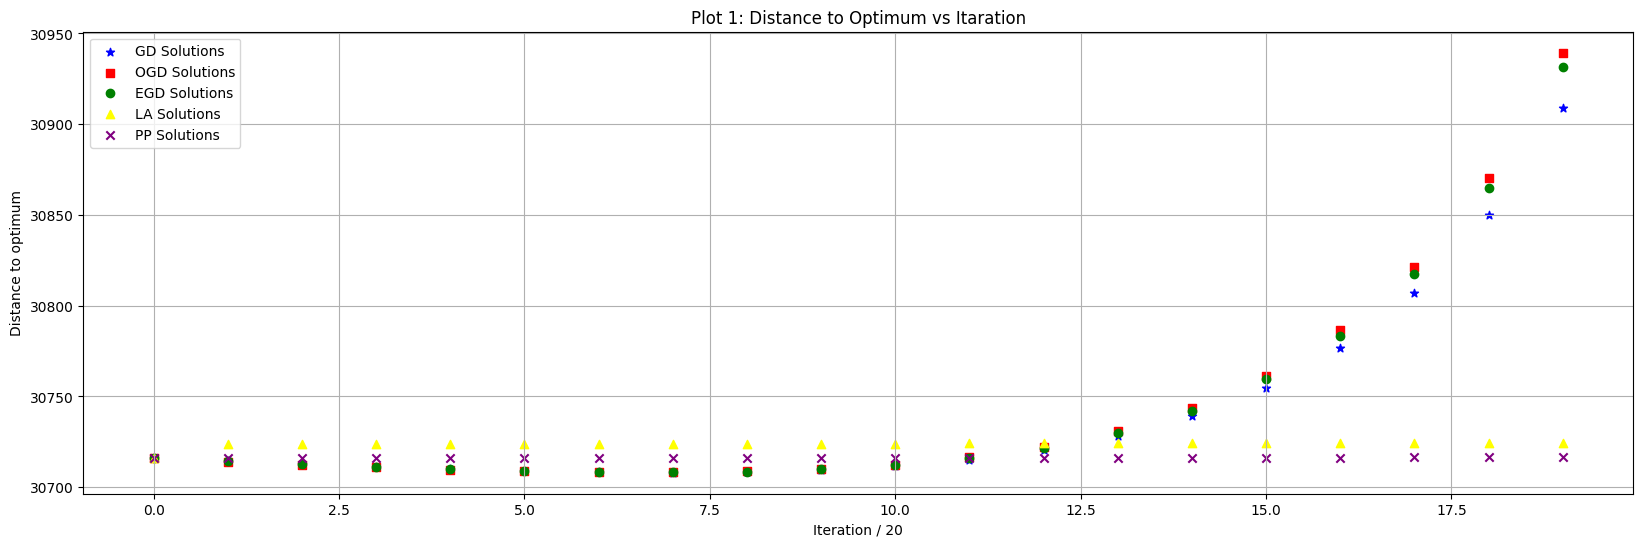

In [136]:
# First Plot
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 6))

#plot each solution
plt.scatter(range(len(GD_distances)), GD_distances, c='blue', marker='*', label='GD Solutions')
plt.scatter(range(len(OGD_distances)), OGD_distances, c='red', marker='s', label='OGD Solutions')
plt.scatter(range(len(EGD_distances)), EGD_distances, c='green', marker='o', label='EGD Solutions')
plt.scatter(range(len(LA_distances)), LA_distances, c='yellow', marker='^', label='LA Solutions')
plt.scatter(range(len(PP_distances)), PP_distances, c='purple', marker='x', label='PP Solutions')


plt.xlabel('Iteration / 20')
plt.ylabel('Distance to optimum')
plt.legend()

plt.title('Plot 1: Distance to Optimum vs Itaration')
plt.grid(True)
plt.show()


In [65]:
parts = num_iter/20
#number of gradient queries per iteration for each method
num_queries_GD = np.arange(1, len(GD_distances) + 1)*parts * 1  # GD uses 1 query per iteration
num_queries_OGD = np.arange(1, len(OGD_distances) + 1)*parts * 1  # OG uses 1 query per iteration
num_queries_EGD = np.arange(1, len(EGD_distances) + 1)*parts * 2  # EG uses 2 queries per iteration
num_queries_LA = np.arange(1, len(LA_distances) + 1)*parts * 5  # LA uses k = 5 query per iteration 
num_queries_PP = np.arange(1, len(PP_distances) + 1)*parts * 1  # PP uses 1 query per iteration

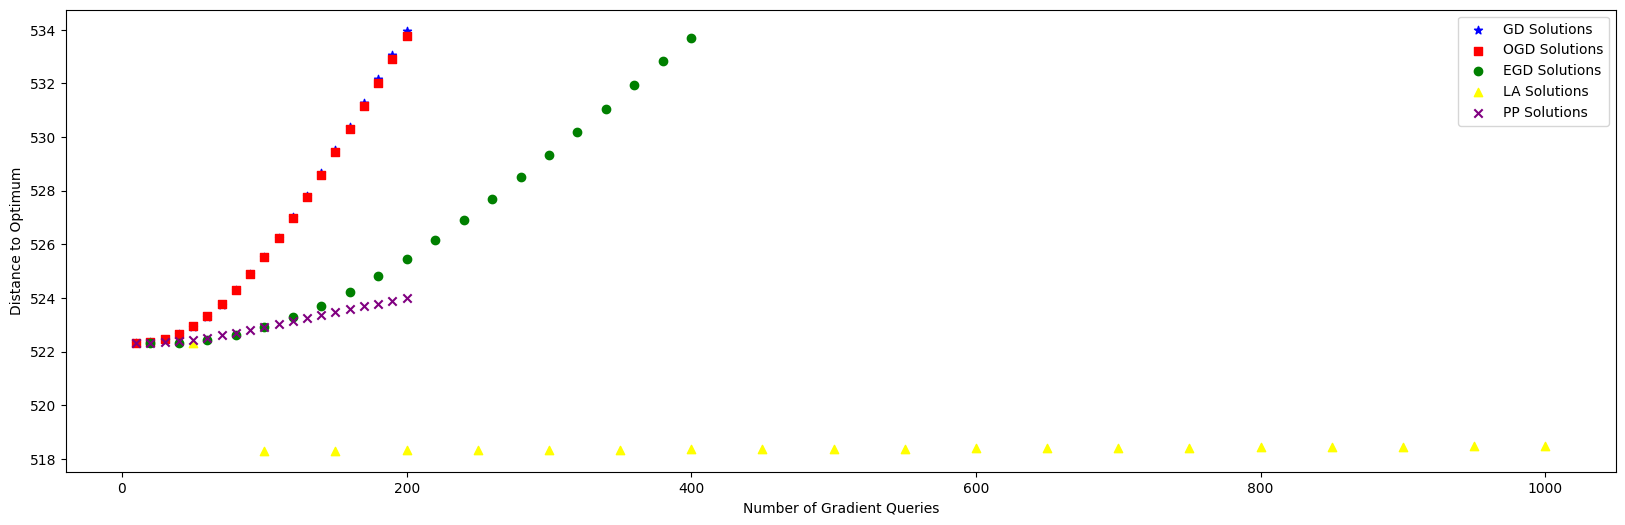

In [66]:
# Plot the convergence curves
plt.figure(figsize=(20, 6))
#plot each solution
plt.scatter(num_queries_GD, GD_distances, c='blue', marker='*', label='GD Solutions')
plt.scatter(num_queries_OGD, OGD_distances, c='red', marker='s', label='OGD Solutions')
plt.scatter(num_queries_EGD, EGD_distances, c='green', marker='o', label='EGD Solutions')
plt.scatter(num_queries_LA, LA_distances, c='yellow', marker='^', label='LA Solutions')
plt.scatter(num_queries_PP, PP_distances, c='purple', marker='x', label='PP Solutions')
plt.xlabel('Number of Gradient Queries')
plt.ylabel('Distance to Optimum')
plt.legend()
plt.show()

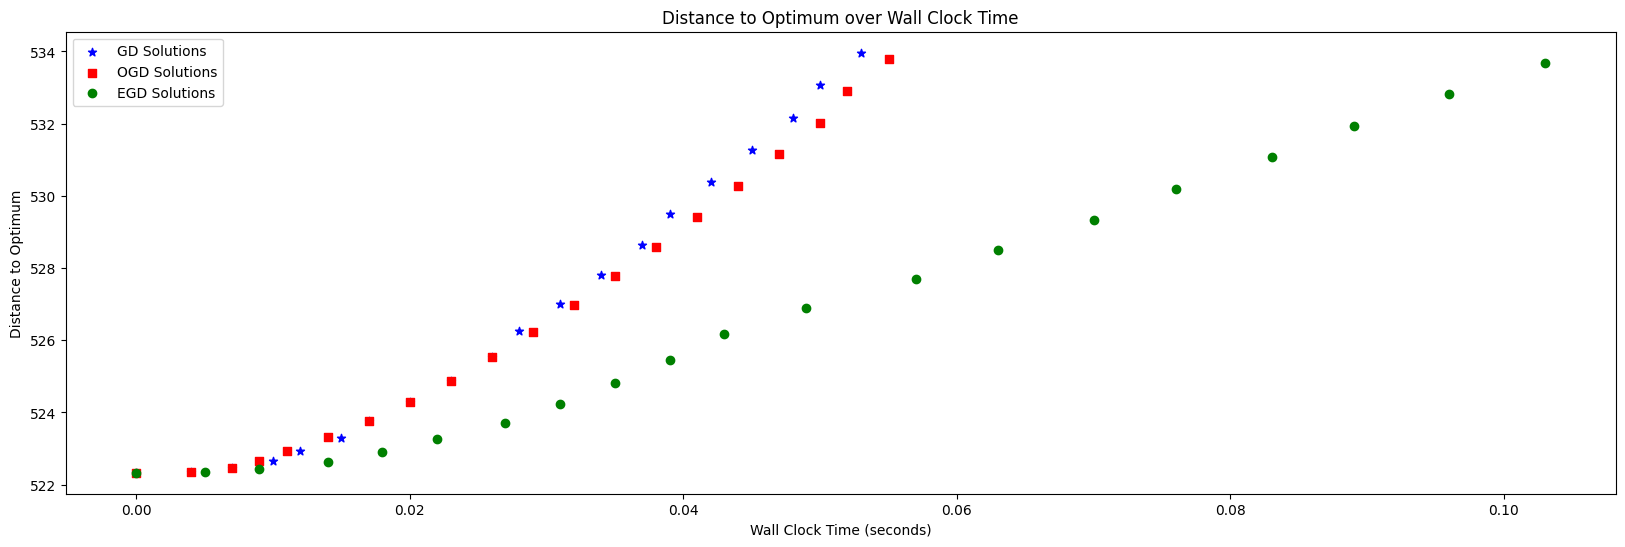

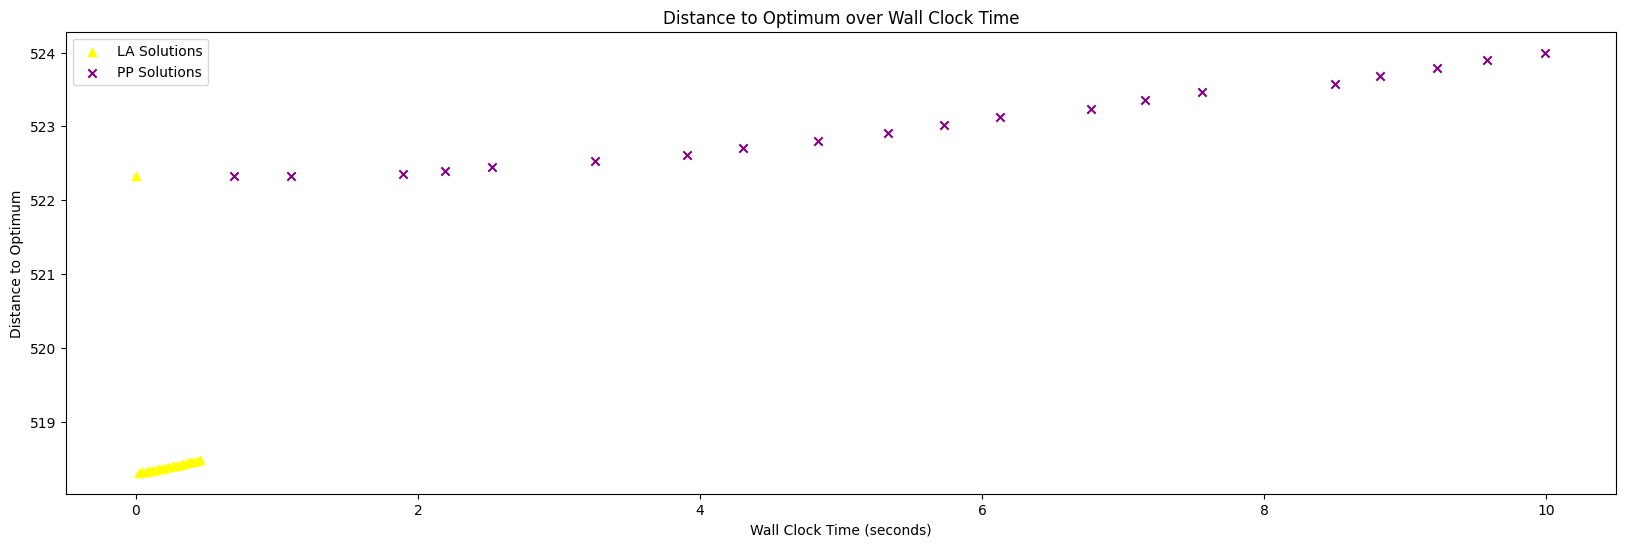

In [67]:
# Plot distance to the optimum
parts = int(num_iter/20)

plt.figure(figsize=(20, 6))
plt.scatter(elapsed_times_GD[::parts], GD_distances, c='blue', marker='*', label='GD Solutions')
plt.scatter(elapsed_times_OGD[::parts], OGD_distances, c='red', marker='s', label='OGD Solutions')
plt.scatter(elapsed_times_EGD[::parts], EGD_distances, c='green', marker='o', label='EGD Solutions')
plt.xlabel('Wall Clock Time (seconds)')
plt.ylabel('Distance to Optimum')
plt.title('Distance to Optimum over Wall Clock Time')
plt.legend()
plt.show()
plt.figure(figsize=(20, 6))
plt.scatter(elapsed_times_LA[::parts], LA_distances, c='yellow', marker='^', label='LA Solutions')
plt.scatter(elapsed_times_PP[::parts], PP_distances, c='purple', marker='x', label='PP Solutions')
plt.xlabel('Wall Clock Time (seconds)')
plt.ylabel('Distance to Optimum')
plt.title('Distance to Optimum over Wall Clock Time')
plt.legend()
plt.show()

# Questions


## Problem 1

1. [Q] Write down the vector field of problem 1.

   [A] 

---
2. [Q] Write down the Jacobian of the vector field.

   [A]

---
3. [Q] What are the eigenvalues of the Jacobian of the vector field $F$?

   [A]
   $
   J(x, y) = \begin{pmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \end{pmatrix} = \begin{pmatrix} \frac{1}{30} + \frac{29}{30} y & \frac{29}{30} x + \frac{1}{30} \\
\frac{29}{30} x & \frac{1}{30} + \frac{29}{30} y \end{pmatrix}
   $

---
4. [Q] What is the spectral radius of the Jacobian of $F$?

   [A]

---
5. [Q] Which mehod you think performs most efficiently for problem 1, and why? Would this conclusion  be the same irrespective of the choice of coefficients of the terms in the objective?

   [A]





## Problem 2

1. [Q] Which method is the fastest on problem 2 in terms of wall clock time, and which one in terms of number of iterations?

   [A]

---
2. [Q] Do you think that this conclusion extends for any choice of the matrix $\mathbf{A}$?

   [A]

---
3. [Q] List ideas (if any) on how could the same problem be implemented with additional constraints that $\mathbf{x}$ and $\mathbf{y}$ belong to the probability simplex?

   [A]

---
4. [Q] Is the operator in problem 2 strongly monotone? Explain/show why.

   [A]

---
5. [Q] Is the operator in problem 2 cocoercive? Explain/show why.

   [A]

## Problems 1 & 2

1. [Q] Is the same method most efficient in both the problems?  

   [A]

---
2. [Q] If yes why so, and if not what do you think is the reason for that?

   [A]

